Problem statement
The goal of this competition is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

Load files

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


Read files

In [3]:
train = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/train.csv")
test = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")
submission = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv")

In [4]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [5]:
test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [6]:
submission

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


Analyse

<AxesSubplot:xlabel='cohesion', ylabel='Count'>

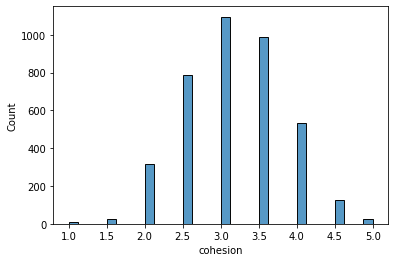

In [7]:
sns.histplot(train['cohesion'])

<AxesSubplot:xlabel='syntax', ylabel='Count'>

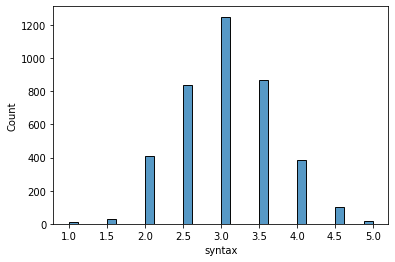

In [8]:
sns.histplot(train['syntax'])

<AxesSubplot:xlabel='vocabulary', ylabel='Count'>

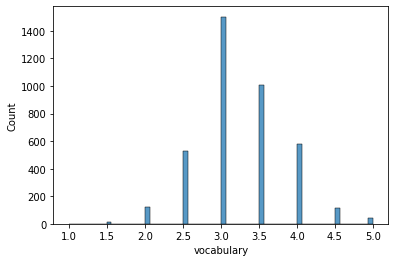

In [9]:
sns.histplot(train['vocabulary'])

<AxesSubplot:xlabel='phraseology', ylabel='Count'>

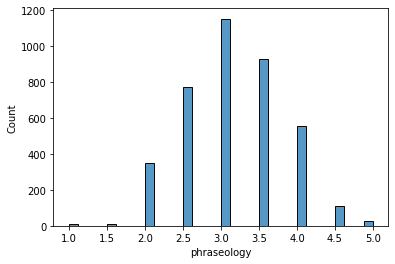

In [10]:
sns.histplot(train['phraseology'])

<AxesSubplot:xlabel='grammar', ylabel='Count'>

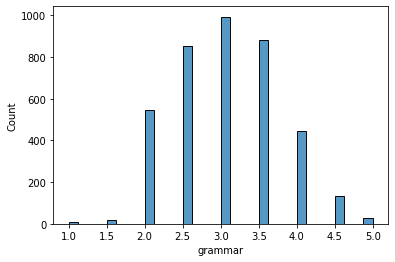

In [11]:
sns.histplot(train['grammar'])

<AxesSubplot:xlabel='conventions', ylabel='Count'>

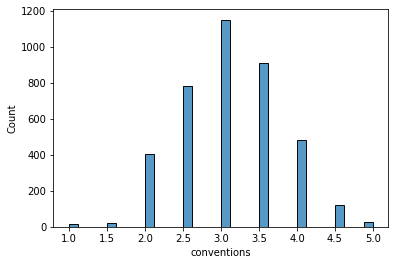

In [12]:
sns.histplot(train['conventions'])

Define target

In [13]:
features = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',  'conventions']
target = train[features]
target

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3906,2.5,3.0,3.0,3.5,2.5,2.5
3907,4.0,4.0,4.0,4.0,3.5,3.0
3908,2.5,3.0,3.0,3.0,3.5,3.0
3909,4.0,4.5,4.5,4.0,4.5,4.5


Combine train and test text

In [14]:
text_train = train['full_text']
text_test = test['full_text']

text = text_train.append(text_test)
text

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
0       when a person has no experience on a job their...
1       Do you think students would benefit from being...
2       Thomas Jefferson once states that "it is wonde...
Name: full_text, Length: 3914, dtype: object

Analyse text

In [15]:
count_words = text.str.findall(r'(\w+)').str.len()
print(count_words.sum())

1707247


Process and clean text

In [16]:
import re
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer, WordNetLemmatizer

#stopwords = set(stopwords.words("english"))
#stemmer = PorterStemmer()
#lemmatizer = WordNetLemmatizer()

""" Cleaning Text """
text = text.str.lower()

#stem the text
#text = text.apply(lambda x: " ".join([stemmer.stem(i)
#for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stopwords]).lower())

#lemmatize the text
#text = text.apply(lambda x: " ".join([lemmatizer.lemmatize(i)
#for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stopwords]).lower())

# removing special characters and numbers
text = text.apply(lambda x : re.sub("[^a-z]\s","",x) )

# remove hash tags
text = text.str.replace("#", "")

#remove words less than 3 character and greater than 7
text = text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 and len(w)<8]))

# removing stopwords
#text = text.apply(lambda x : " ".join(word for word in x.split() if word not in stopwords ))

count_words = text.str.findall(r'(\w+)').str.len()
print(count_words.sum())

1065764


Remove frequently used words

In [17]:

most_freq_words = pd.Series(' '.join(text).lower().split()).value_counts()[:25]
text = text.apply(lambda x : " ".join(word for word in x.split() if word not in most_freq_words ))
print(most_freq_words)

count_words = text.str.findall(r'(\w+)').str.len()
print(count_words.sum())


the        52659
and        39583
you        34868
that       28103
they       23446
have       20288
can        18359
for        17018
are        14473
not        13788
because    13384
people     12691
with       11406
will       11048
your       10822
school     10213
their      10099
more        8945
what        8575
get         8213
good        8038
like        7206
time        7130
work        6861
want        6842
dtype: int64
661706


Apostrophe dictionary

In [18]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

Function to replace words in dictionary

In [19]:
def lookup_dict(txt, dictionary):
    for word in txt.split():
        if word.lower() in dictionary:
            if word.lower() in txt.split():
                txt = txt.replace(word, dictionary[word.lower()])
    return txt

In [20]:
text = text.apply(lambda x: lookup_dict(x,apostrophe_dict))

Remove rare words

In [21]:
from collections import Counter
from itertools import chain

# split words into lists
v = text.str.split().tolist() 
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
text = [' '.join([j for j in i if c[j] > 1]) for i in v]
text = pd.Series(text)

total_word = 0
for x,word in enumerate(text):
    num_word = len(word.split())
    #print(num_word)
    total_word = total_word + num_word
print(total_word)

655620


Define X, y and X_text

In [22]:
y = target
X = text[: len(train)]
X_test = text[len(train) :]
X.shape, X_test.shape, y.shape

((3911,), (3,), (3911, 6))

Convertt text to frequency

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.01)

#X = X.to_list()
X = list(map(''.join, X))

#X_train = np.array(X_train).tolist()
#X_train = list(map(''.join, X_train))

#X_val = np.array(X_val).tolist()
#X_val = list(map(''.join, X_val))

X_test = np.array(X_test).tolist()
X_test = list(map(''.join, X_test))

X_tfIdf = vectorizer_tfidf.fit_transform(X)
#X_train_tfIdf = vectorizer_tfidf.fit_transform(X_train)
#X_val_tfIdf = vectorizer_tfidf.transform(X_val)
X_test_tfIdf = vectorizer_tfidf.transform(X_test)
print(vectorizer_tfidf.get_feature_names_out()[:5])

['1years' 'ability' 'able' 'accept' 'access']


In [24]:
X_tfIdf.shape, X_test_tfIdf.shape, y.shape

((3911, 892), (3, 892), (3911, 6))

Select model

In [25]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

chain = MultiOutputRegressor(SVR())
chain.fit(X_tfIdf, y)
print(chain.score(X_tfIdf,y))

0.8650634899365106


Predict on X_test

In [26]:
predictions = chain.predict(X_test_tfIdf)
predictions

array([[2.95117865, 2.76305121, 3.18628012, 3.03461107, 2.63614762,
        2.65082563],
       [3.2355938 , 3.03939367, 3.03709362, 2.69927823, 2.74425774,
        3.17364303],
       [3.56691566, 3.43049379, 3.68952995, 3.43360652, 3.37950925,
        3.37137239]])

Prepare submission

In [27]:
submission['cohesion'] = predictions[:,0]
submission['syntax'] = predictions[:,1]
submission['vocabulary'] = predictions[:,2]
submission['phraseology'] = predictions[:,3]
submission['grammar'] = predictions[:,4]
submission['conventions'] = predictions[:,5]

submission.to_csv('submission.csv',index=False) # writing data to a CSV file
submission = pd.read_csv("submission.csv")
submission


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.951179,2.763051,3.186280,3.034611,2.636148,2.650826
1,000BAD50D026,3.235594,3.039394,3.037094,2.699278,2.744258,3.173643
2,00367BB2546B,3.566916,3.430494,3.689530,3.433607,3.379509,3.371372
